In [1]:
# TRABALHO 2: RECONHECIMENTO DE PADRÕES

In [2]:
import nltk
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


import pandas as pd

import string
import math
import os

#DIRETÓRIO COM AS PASTAS DOS GRUPOS E OS DOCUMENTOS DENTRO
DIR = "C:\\Users\\vinicius\\Desktop\\Padroes\\Trabalho2\\AllDocs\\"

groups = {}

#CRIA O DICIONÁRIO COM UM VETOR VAZIO AONDE VAI SER INSERIDO OS DOCUMENTOS DE CADA GRUPO
for subDirName in os.listdir(DIR):
    groups[subDirName] = []
    

#ADICIONA OS DOCUMENTOS EM CADA RESPECTIVO GRUPO
for group in groups:
    for document in os.listdir(DIR + group + "\\"):
        file = open(DIR + group + "\\" + document, "r")
        groups[group].append(file.read())
        
def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens: stems.append(PorterStemmer().stem(item))
    spacedStems = " ".join(stems)
    return spacedStems
  
#TOKENIZA TODOS OS DOCUMENTOS DE TODOS OS GRUPOS    
for group in groups:
    for i in range(len(groups[group])):
        groups[group][i] = tokenize(groups[group][i])

my_stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

vectorizer = TfidfVectorizer(stop_words=my_stop_words)

documents_together = []
for group in groups:
    for i in range(len(groups[group])):
        documents_together.append(groups[group][i])
        
final_top_words = {}

for group in groups:
    matrix = vectorizer.fit_transform(groups[group]).todense()
    matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
    top_words = matrix.sum(axis=0).sort_values(ascending=False)
    final_top_words[group] = (top_words[0:15]).keys()
    
top_words_grouped = []
for group in final_top_words:
    top_words_grouped.append(final_top_words[group][0:len(final_top_words[group])])

top_words_together = []
for i in range(0, len(np.array(top_words_grouped))):
    for word in np.array(top_words_grouped)[i]:
        top_words_together.append(word)
            
top_words_together_unique = []
top_words_together_unique = list(set(top_words_together))

#TF
tf = []
for d in range(0,len(documents_together)):
    doc = []
    for word in top_words_together_unique:
        doc.append(documents_together[d].count(word) / len(documents_together[d].split()))
    tf.append(doc)
    
#IDF
df = []
for d in range(0,len(documents_together)):
    doc = []
    for w in range(0,len(top_words_together_unique)):
        doc.append(0)  
    df.append(doc)
    

for d in range(0,len(documents_together)):
    for w in range(0,len(top_words_together_unique)):
        if(documents_together[d].count(top_words_together_unique[w]) > 0):
            for d in range(0,len(documents_together)):
                df[d][w] += 1

idf = []
for d in range(0,len(documents_together)):
    doc = []
    for w in range(0,len(top_words_together_unique)):
        if(df[d][w] == 0):
            doc.append(0)
        else:
            doc.append(np.log(len(documents_together)/df[d][w]))
    idf.append(doc)
    
tfidf = []
for i in range(0, len(idf)):
    doc = []
    for z in range(len(idf[i])):
        doc.append(tf[i][z] * idf[i][z])
    tfidf.append(doc)
    
print(len(tfidf[0]))    

89


[ 0.30364258 -0.32014081 -0.03364631 -0.19642994  0.15859526 -0.04906339
 -0.09115715]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 152 samples in 0.001s...
[t-SNE] Computed neighbors for 152 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 152 / 152
[t-SNE] Mean sigma: 1.346077
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 56.6453400, gradient norm = 0.5142331 (50 iterations in 0.264s)
[t-SNE] Iteration 100: error = 54.0789757, gradient norm = 0.5162555 (50 iterations in 0.282s)
[t-SNE] Iteration 150: error = 56.5119209, gradient norm = 0.5218320 (50 iterations in 0.283s)
[t-SNE] Iteration 200: error = 54.4738388, gradient norm = 0.5296057 (50 iterations in 0.268s)
[t-SNE] Iteration 250: error = 57.1024590, gradient norm = 0.5173810 (50 iterations in 0.315s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.102459
[t-SNE] Iteration 300: error = 0.5742645, gradient norm = 0.0091093 (50 ite

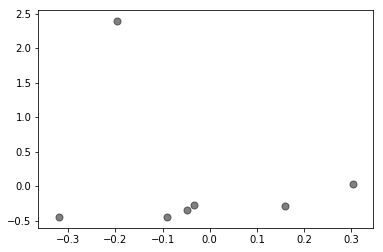

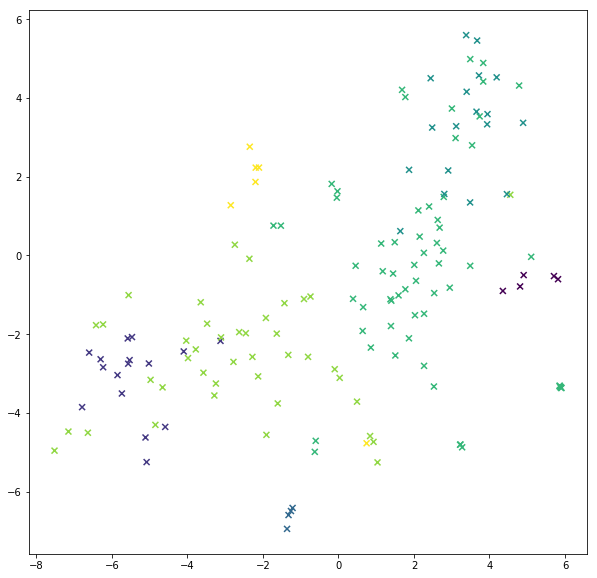

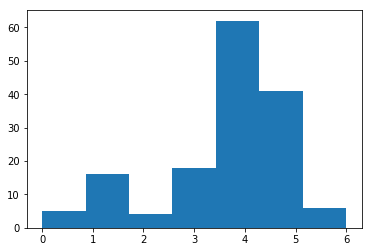

In [13]:
#USAR A VAR tfidf PARA O TESTES
#K-MEANS
kmeans = KMeans(n_clusters = 7, init = 'random', max_iter = 300)
kmeans.fit(tfidf)
y_kmeans = kmeans.predict(tfidf)

centers = kmeans.cluster_centers_
print(centers[:, 0])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

k = 7
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfidf)
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = kmeans.labels_)
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(kmeans.labels_, bins=k)
plt.show()



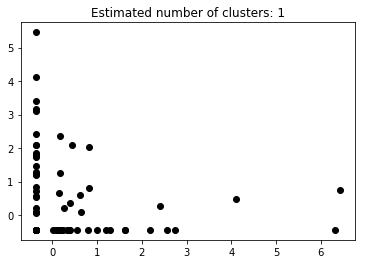

In [4]:
#Import libraries to use on DBScan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

tfidf = StandardScaler().fit_transform(tfidf)

#COMPUTAR DBSCAN
db = DBSCAN(eps=0.1, min_samples=15).fit(tfidf)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

q_clusters_ = len(set(labels))

#Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = tfidf[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = tfidf[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % q_clusters_)
plt.show()

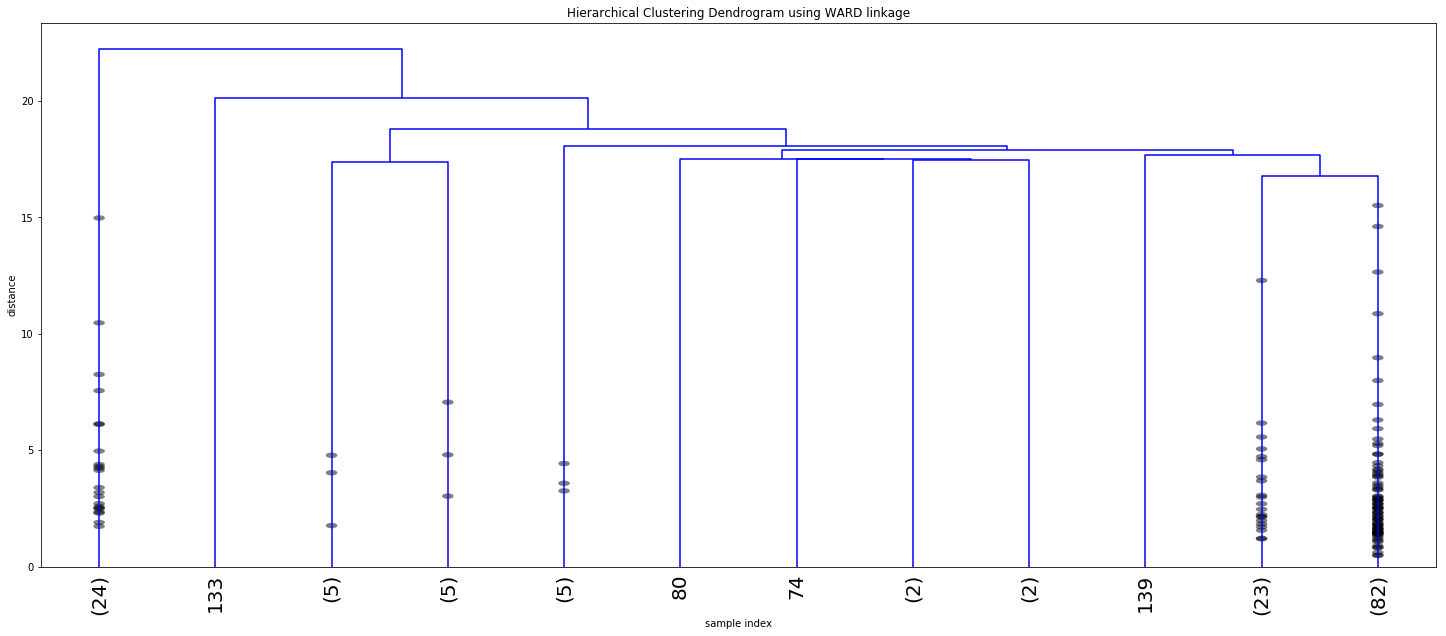

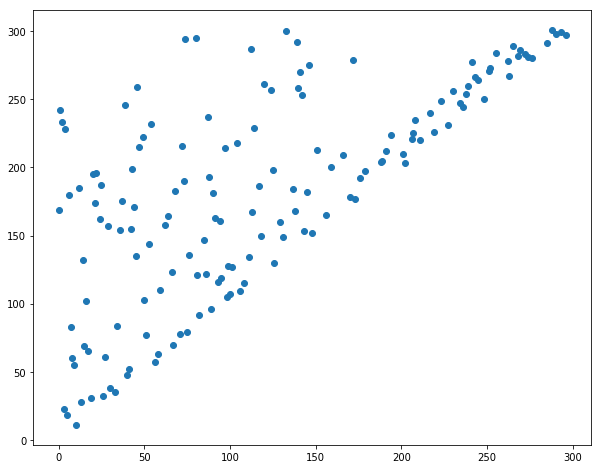

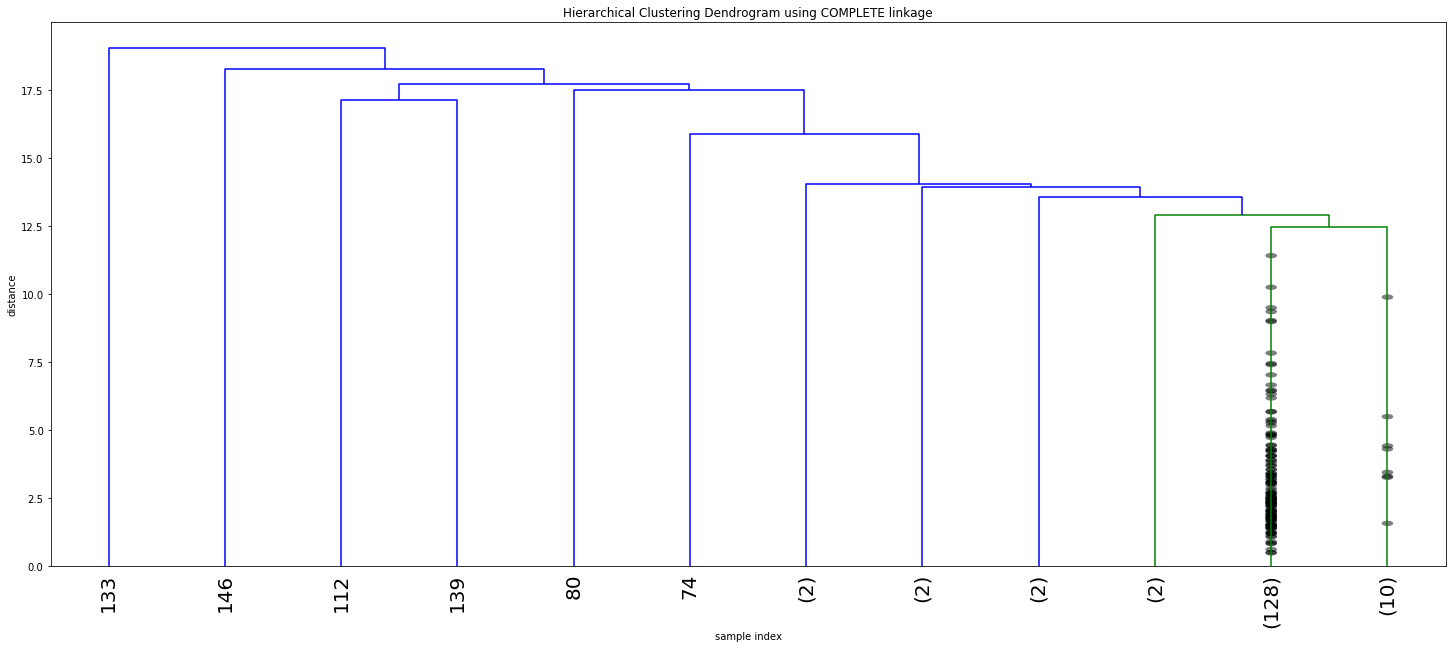

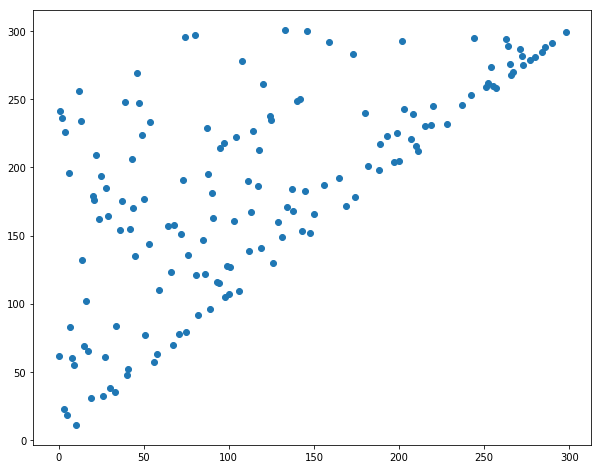

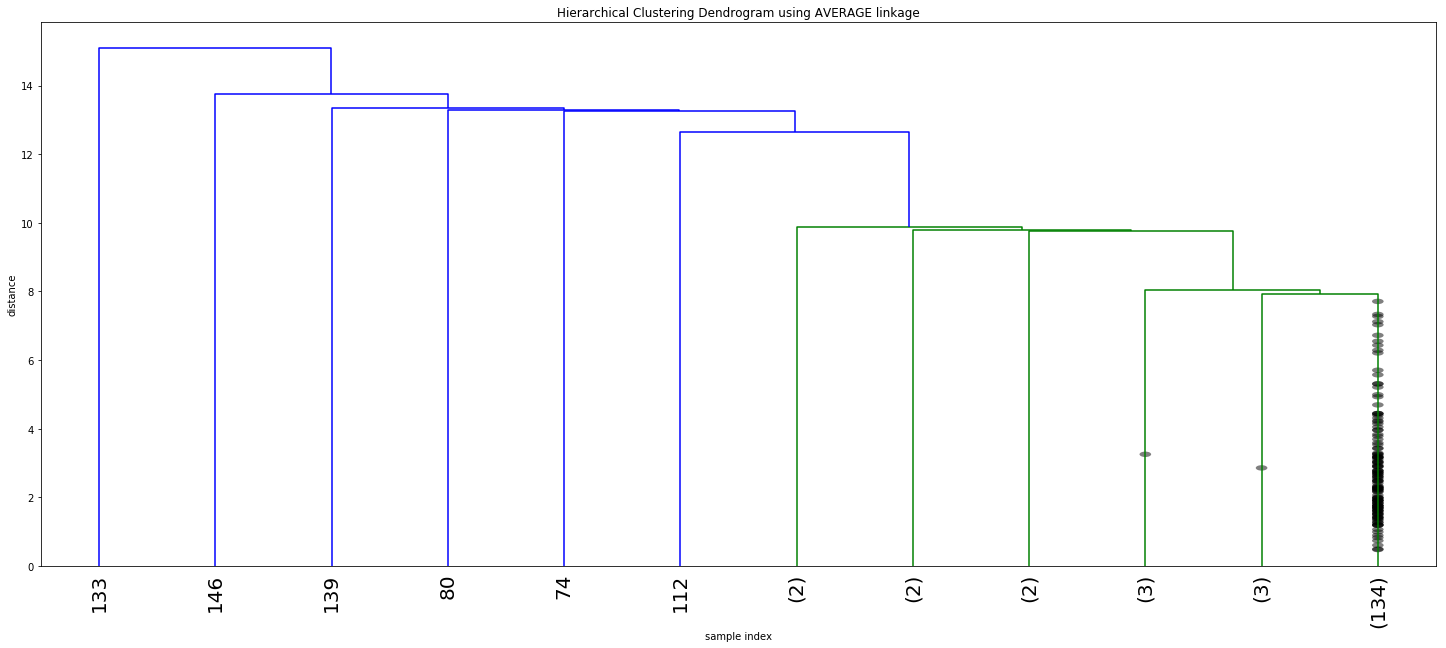

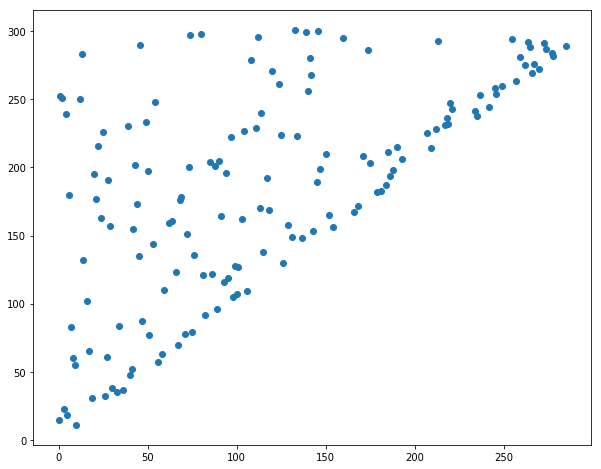

In [9]:
#HIERARQUICO
'''There are 3 forms to group: 
    1) ward (minimizes the variance of the clusters being merged),
    2) complete (uses maximum distances between all observations of the two sets)
    3) average (uses the average of the distances of each observation of the two sets)
    
    This implementation was based on this tutorial: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
'''
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

ward = linkage(tfidf, 'ward')
c, coph_dists = cophenet(ward, pdist(tfidf))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using WARD linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(ward, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ward[:,0], ward[:,1])
plt.show()

complete = linkage(tfidf, 'complete')
c, coph_dists = cophenet(complete, pdist(tfidf))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using COMPLETE linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(complete, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(complete[:,0], complete[:,1])
plt.show()

average = linkage(tfidf, 'average')
c, coph_dists = cophenet(average, pdist(tfidf))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram using AVERAGE linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(average, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(average[:,0], average[:,1])
plt.show()